In [1]:
import numpy
import numpy.random as ran
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def d( x, d0, xbar, sigma ):
	return d0 * numpy.exp(-(x - xbar)**2 / (2 * sigma**2))

plt.figure(figsize=(8,6), dpi=80)
plt.subplot(111)

normalData = ran.normal(5,1.25,100000)
(normalHist, edges, patches) = plt.hist(normalData, bins=50, range=None, rwidth=0.9, density=True, color=None, label="hist")

xmin = 0
xmax = 10.0
ymin = 0.0
ymax = normalHist.max()*1.1

plt.title("Histogram for Randomly Generated Gaussian Data")
plt.xlabel("data values")
plt.ylabel("normalized count")
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

xdata = []
for i in range(len(edges)-1):
	x = (edges[i] + edges[i+1]) / 2
	xdata.append(x)

plt.scatter(xdata, normalHist, 20, color="blue", zorder=2, label="midpoints")

(popt, pcov) = curve_fit(d, xdata, normalHist, bounds=(0,numpy.inf))

print(popt)

print("Integral of my fitted function: %.3f" % (popt[0]*numpy.sqrt(2*numpy.pi)*popt[2]))

xfitted = numpy.linspace(xmin,xmax,1001,endpoint=True)
yfitted = d(xfitted,popt[0],popt[1],popt[2])
plt.plot(xfitted, yfitted, color="red", linewidth=2.0, linestyle="--", label="fitted")

plt.legend(loc='upper left', frameon=False)

plt.savefig("prob1.pdf",dpi=72)

plt.show()


[0.31815643 5.00011057 1.25485428]
Integral of my fitted function: 1.001


<Figure size 640x480 with 1 Axes>

[  0.5736595  -12.84995063]
[  6.44574372 -13.06260256  -0.54602399]
[  6.43067556 -25.15864809  -0.13051232   0.65663047]
[ -8.80079682 -23.07085263   4.58175536   0.45844749  -0.18176669]
[-3.47580852  1.89244137  1.20456212 -2.98787282 -0.01030679  0.09921148]
It would seem that a 5th degree polynomial is necessary to obtain a good fit:
f(x) = -3.476 + 1.892*x + 1.205*x^2 + -2.988*x^3 + -0.010*x^4 + 0.099*x^5


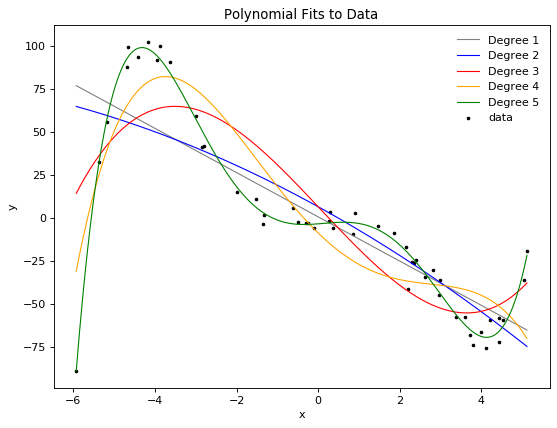

In [5]:
import numpy
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

data = numpy.loadtxt('LinearFit.csv')
xdata = data.T[0]
ydata = data.T[1]

xmin = xdata.min()
xmax = xdata.max()
ymin = ydata.min()
ymax = ydata.max()

plt.figure(figsize=(8,6), dpi=80)
plt.subplot(111)
plt.scatter(xdata, ydata, 5, color="black", label="data")

def poly1( x, a, b ):
	return a + b * x

def poly2( x, a, b, c ):
	return a + b * x + c * x**2

def poly3( x, a, b, c, d ):
	return a + b * x + c * x**2 + d * x**3

def poly4( x, a, b, c, d, e ):
	return a + b * x + c * x**2 + d * x**3 + e * x**4

def poly5( x, a, b, c, d, e, f ):
	return a + b * x + c * x**2 + d * x**3 + e * x**4 + f * x**5

(popt1, pcov1) = curve_fit(poly1, xdata, ydata)
(popt2, pcov2) = curve_fit(poly2, xdata, ydata)
(popt3, pcov3) = curve_fit(poly3, xdata, ydata)
(popt4, pcov4) = curve_fit(poly4, xdata, ydata)
(popt5, pcov5) = curve_fit(poly5, xdata, ydata)

print(popt1)
print(popt2)
print(popt3)
print(popt4)
print(popt5)

xfitted = numpy.linspace(xmin,xmax,1001,endpoint=True)
yfitted1 = poly1(xfitted,popt1[0],popt1[1])
yfitted2 = poly2(xfitted,popt2[0],popt2[1],popt2[2])
yfitted3 = poly3(xfitted,popt3[0],popt3[1],popt3[2],popt3[3])
yfitted4 = poly4(xfitted,popt4[0],popt4[1],popt4[2],popt4[3],popt4[4])
yfitted5 = poly5(xfitted,popt5[0],popt5[1],popt5[2],popt5[3],popt5[4],popt5[5])
plt.plot(xfitted, yfitted1, color="gray", linewidth=1.0, linestyle="-", label="Degree 1")
plt.plot(xfitted, yfitted2, color="blue", linewidth=1.0, linestyle="-", label="Degree 2")
plt.plot(xfitted, yfitted3, color="red", linewidth=1.0, linestyle="-", label="Degree 3")
plt.plot(xfitted, yfitted4, color="orange", linewidth=1.0, linestyle="-", label="Degree 4")
plt.plot(xfitted, yfitted5, color="green", linewidth=1.0, linestyle="-", label="Degree 5")

plt.title("Polynomial Fits to Data")
plt.xlabel("x")
plt.ylabel("y")

plt.legend(loc='upper right', frameon=False)

print("It would seem that a 5th degree polynomial is necessary to obtain a good fit:\nf(x) = %.3f + %.3f*x + %.3f*x^2 + %.3f*x^3 + %.3f*x^4 + %.3f*x^5" % (popt5[0],popt5[1],popt5[2],popt5[3],popt5[4],popt5[5]))

plt.savefig("prob2.pdf",dpi=72)

plt.show()


[1.93655801 2.51730928]
[0.52986788 2.93776357]
[1.98686307 2.49442969 0.60740159 2.88540388]


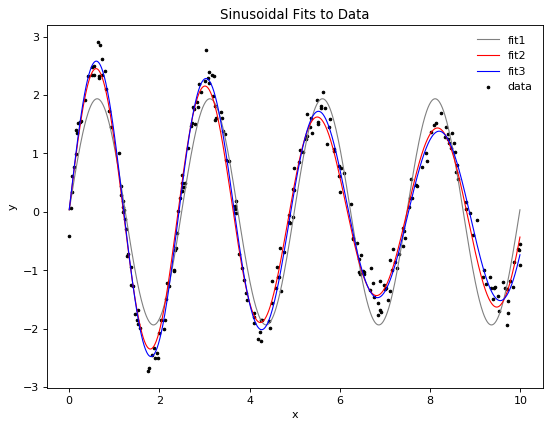

In [6]:
import numpy
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

xdata,ydata = numpy.loadtxt('nonLinearFit.csv',unpack=True)

xmin = xdata.min()
xmax = xdata.max()
ymin = ydata.min()
ymax = ydata.max()

plt.figure(figsize=(8,6), dpi=80)
plt.subplot(111)
plt.scatter(xdata, ydata, 5, color="black", label="data")

xfitted = numpy.linspace(xmin,xmax,1001,endpoint=True)

def fit1( x, a, k ):
	return a * numpy.sin(k * x)

# First fit with just a single sine function
(popt1, pcov1) = curve_fit(fit1, xdata, ydata, p0=(3,2.5))

print(popt1)

yfitted1 = fit1(xfitted,popt1[0],popt1[1])
plt.plot(xfitted, yfitted1, color="gray", linewidth=1.0, linestyle="-", label="fit1")

def fit3( x, a1, k1, a2, k2 ):
	return fit1(x, a1, k1) + fit1(x, a2, k2)

def fit2( x, a, k ):
	return fit3(x, popt1[0], popt1[1], a, k)

# Now use those fit parameters for one of the two sinusoids and fit the other sinusoid
(popt2, pcov2) = curve_fit(fit2, xdata, ydata, p0=(1.1*popt1[0],1.1*popt1[1]), sigma=None, bounds=(-numpy.inf,numpy.inf))

print(popt2)

yfitted2 = fit2(xfitted,popt2[0],popt2[1])
plt.plot(xfitted, yfitted2, color="red", linewidth=1.0, linestyle="-", label="fit2")

# Finally, we can use our results from the previous two phases to try and fit all the parameters simultaneously
(popt3, pcov3) = curve_fit(fit3, xdata, ydata, p0=(popt1[0],popt1[1],popt2[0],popt2[1]), sigma=None, bounds=(-numpy.inf,numpy.inf))

print(popt3)

yfitted3 = fit3(xfitted,popt3[0],popt3[1],popt3[2],popt3[3])
plt.plot(xfitted, yfitted3, color="blue", linewidth=1.0, linestyle="-", label="fit3")

plt.title("Sinusoidal Fits to Data")
plt.xlabel("x")
plt.ylabel("y")

plt.legend(loc='upper right', frameon=False)

#print("Uncomment plt.plot() calls for the first two phases if you wish to see them!")

plt.savefig("prob3.pdf",dpi=72)

plt.show()


Comparison of mean and standard deviation of individual peaks to fit data:

  Mean for peak 1: 0.919	xbar1 from fit: 0.995
  Mean for peak 2: 2.510	xbar2 from fit: 2.563

  Standard deviation for peak 1: 0.522	sigma1 from fit: 0.574
  Standard deviation for peak 2: 0.332	sigma2 from fit: 0.290


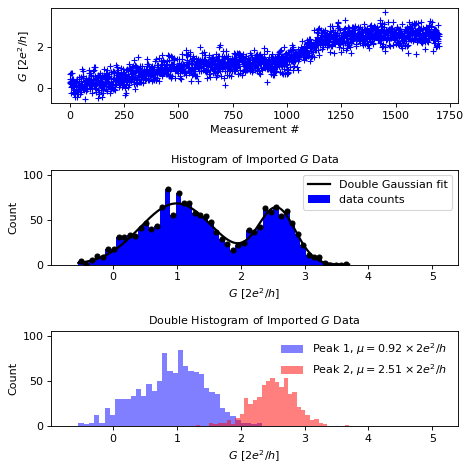

In [7]:
import numpy
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

fs=10  # used as fontsize

data = numpy.loadtxt('DoubleGaussian.csv')

def d( x, d0, xbar, sigma ):
	return d0 * numpy.exp(-(x - xbar)**2 / (2 * sigma**2))

def d2( x, d01, xbar1, sigma1, d02, xbar2, sigma2 ):
	return d(x, d01, xbar1, sigma1) + d(x, d02, xbar2, sigma2)

fig = plt.figure(figsize=(6,6), dpi=80)

### Part (a)
plt.subplot(311)
plt.plot(data,linestyle="",marker="+", color='blue')
plt.xlabel('Measurement #', fontsize=fs)
plt.ylabel('$G$ [$2e^2/h$]', fontsize=fs)

### Parts (b) - (c) ###
plt.subplot(312)

(histData, edges, patches) = plt.hist(data, bins=50, color="blue", label="data counts")

xmin = edges[0]
xmax = edges[-1]
xrange = xmax - xmin
ymin = 0.0
ymax = histData.max()
yrange = ymax - ymin

plt.xlim(xmin - 0.1 * xrange, xmax + 0.4 * xrange)
plt.ylim(ymin, ymax + 0.25 * yrange)

xdata = []
for i in range(len(edges)-1):
	x = (edges[i] + edges[i+1]) / 2
	xdata.append(x)

plt.scatter(xdata, histData, 20, color="black", zorder=2#, label="midpoints"
)

(popt, pcov) = curve_fit(d2, xdata, histData, bounds=(0,numpy.inf))

xfitted = numpy.linspace(xmin,xmax,1001,endpoint=True)
yfitted = d2(xfitted,popt[0],popt[1],popt[2],popt[3],popt[4],popt[5])
plt.plot(xfitted, yfitted, color="black", linewidth=2.0, linestyle="-", label="Double Gaussian fit")

plt.title("Histogram of Imported $G$ Data", fontsize=fs)
plt.xlabel("$G$ $[2e^2/h]$", fontsize=fs)
plt.ylabel("Count", fontsize=fs)

plt.legend(loc='upper right', 
		   #bbox_to_anchor=(1.0, 0.9),
		   fontsize=fs)


### Parts (d) -(e) ###
peak1data = data[:1100]
peak2data = data[1100:]

mean1 = numpy.mean(peak1data)
mean2 = numpy.mean(peak2data)

stdev1 = numpy.std(peak1data,ddof=1)
stdev2 = numpy.std(peak2data,ddof=1)

if (mean1 < mean2):
    meanSmall = mean1
    stdevSmall = stdev1
    meanLarge = mean2
    stdevLarge = stdev2
else:
    meanSmall = mean2
    stdevSmall = stdev2
    meanLarge = mean1
    stdevLarge = stdev1

if (popt[1] < popt[4]):
    poptMeanSmall = popt[1]
    poptStdevSmall = popt[2]
    poptMeanLarge = popt[4]
    poptStdevLarge = popt[5]
else:
    poptMeanSmall = popt[4]
    poptStdevSmall = popt[5]
    poptMeanLarge = popt[1]
    poptStdevLarge = popt[2]

print(f"Comparison of mean and standard deviation of individual peaks to fit data:\n\n"
	f"  Mean for peak 1: {meanSmall:.3f}"
	f"\txbar1 from fit: {poptMeanSmall:.3f}\n"
	f"  Mean for peak 2: {meanLarge:.3f}"
	f"\txbar2 from fit: {poptMeanLarge:.3f}\n\n"
	f"  Standard deviation for peak 1: {stdevSmall:.3f}"
	f"\tsigma1 from fit: {poptStdevSmall:.3f}\n"
	f"  Standard deviation for peak 2: {stdevLarge:.3f}"
	f"\tsigma2 from fit: {poptStdevLarge:.3f}")

plt.subplot(313)

(histData1, edges1, patches1) = plt.hist(peak1data, 
	bins=35, color="blue", 
	label=f"Peak 1, $\mu={mean1:.2f} \\times 2e^2/h$", 
	alpha=0.5)
(histData2, edges2, patches2) = plt.hist(peak2data, bins=35, color="red", 
	label=f"Peak 2, $\mu={mean2:.2f} \\times 2e^2/h$", 
	alpha=0.5)

plt.title("Double Histogram of Imported $G$ Data", fontsize=fs)
plt.xlabel("$G$ $[2e^2/h]$", fontsize=fs)
plt.ylabel("Count", fontsize=fs)

xmin = edges1[0]
xmax = edges2[-1]
xrange = xmax - xmin
ymin = 0.0
ymax = numpy.max([histData1.max(),histData2.max()])
yrange = ymax - ymin
plt.xlim(xmin - 0.1 * xrange, xmax + 0.4 * xrange)
plt.ylim(0, ymax + 0.25 * yrange)

plt.legend(loc='upper right', frameon=False)

fig.set_tight_layout(True)

plt.savefig("prob4.pdf",dpi=72)

plt.show()
